In [20]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

from toolbox_continu_inzicht.base.data_adapter import Config, DataAdapter
from toolbox_continu_inzicht.fragility_curves import (
    ChangeCrestHeightFragilityCurveOvertopping,
    FragilityCurveOvertopping,
    ShiftFragilityCurveOvertopping,
)


In [21]:
path = Path.cwd() / "data_sets"
config = Config(config_path=path / "test_fragility_curve_overtopping.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

In [22]:
FCO = FragilityCurveOvertopping(data_adapter=data_adapter)
FCO.run(
    input=["slopes", "profiles", "bedlevel_fetch"],
    output="fragility_curves",
)

<Axes: xlabel='waterlevels'>

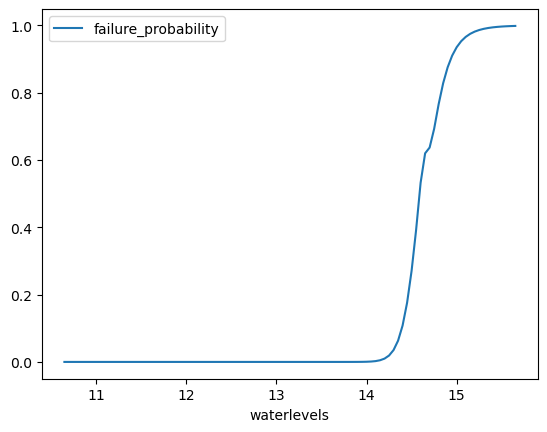

In [23]:
FCO.df_out.set_index("waterlevels").plot()

In [24]:
SFCC = ShiftFragilityCurveOvertopping(data_adapter=data_adapter)

SFCC.run(
    input=["slopes", "profiles", "bedlevel_fetch"],
    output="fragility_curves",
    effect=0.5,
)

<Axes: xlabel='waterlevels'>

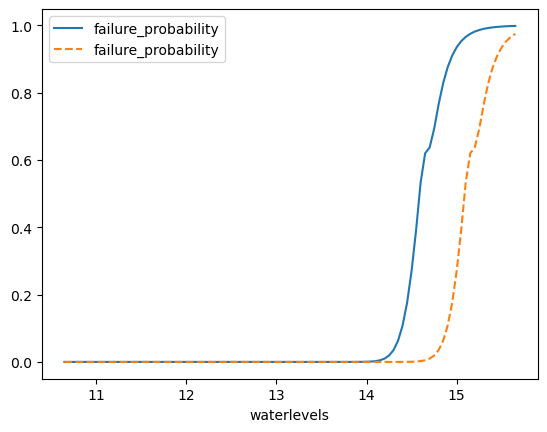

In [25]:
fig, ax = plt.subplots(1, 1)
FCO.df_out.set_index("waterlevels").plot(ax=ax)
SFCC.df_out.set_index("waterlevels").plot(ax=ax, linestyle="--")

In [26]:
CCHFCO = ChangeCrestHeightFragilityCurveOvertopping(data_adapter=data_adapter)

CCHFCO.run(
    input=["slopes", "profiles", "bedlevel_fetch"],
    output="fragility_curves",
    effect=0.5,
)

In [27]:
(
    ~np.isclose(
        FCO.df_out["failure_probability"].iloc[41:59].to_list(),
        CCHFCO.df_out["failure_probability"].iloc[41:59].to_list(),
    )
).all()

np.True_

<Axes: xlabel='waterlevels'>

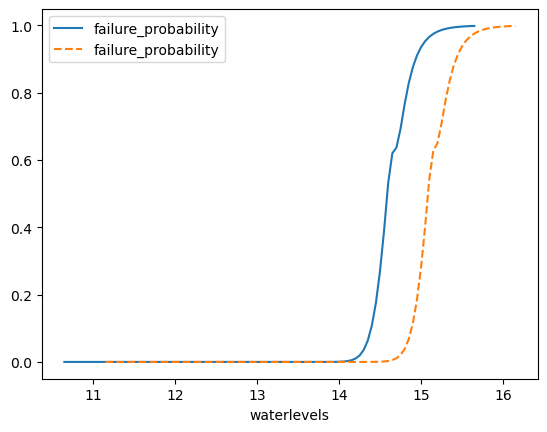

In [28]:
fig, ax = plt.subplots(1, 1)
FCO.df_out.set_index("waterlevels").plot(ax=ax)
CCHFCO.df_out.set_index("waterlevels").plot(ax=ax, linestyle="--")